(105, 207)
(160, 27)
(27, 42)
(87, 221)
(143, 215)
(153, 249)
(34, 211)
(238, 117)
(246, 202)
(123, 16)
(43, 117)
(102, 214)
(122, 57)
(40, 46)
(13, 100)
(73, 4)
(99, 146)
(52, 203)
(48, 198)
(162, 105)
(72, 159)
(158, 66)
(59, 115)
(80, 230)
(130, 6)
(55, 208)
(186, 93)
(165, 39)
(97, 81)
(29, 193)
(124, 173)
(146, 214)
(82, 209)
(179, 126)
(30, 201)
(109, 23)
(96, 45)
(181, 4)
(229, 40)
0  :  [(300, 300), (327, 258), (443, 85), (399, 154), (458, 234), (479, 174)]
1  :  [(300, 300), (213, 79), (343, 183), (287, 200), (348, 102), (359, 185), (380, 70), (271, 107), (270, 99)]
2  :  [(300, 300), (54, 98), (177, 284), (227, 296), (170, 294), (114, 207), (191, 277)]
3  :  [(300, 300), (140, 327), (147, 549), (62, 417), (260, 346), (176, 473), (204, 345), (119, 304), (71, 340)]
4  :  [(300, 300), (195, 507), (266, 511), (198, 514), (352, 503), (228, 459), (355, 508), (218, 509)]
5  :  [(300, 300), (422, 357), (462, 405), (465, 339), (397, 381), (446, 514)]


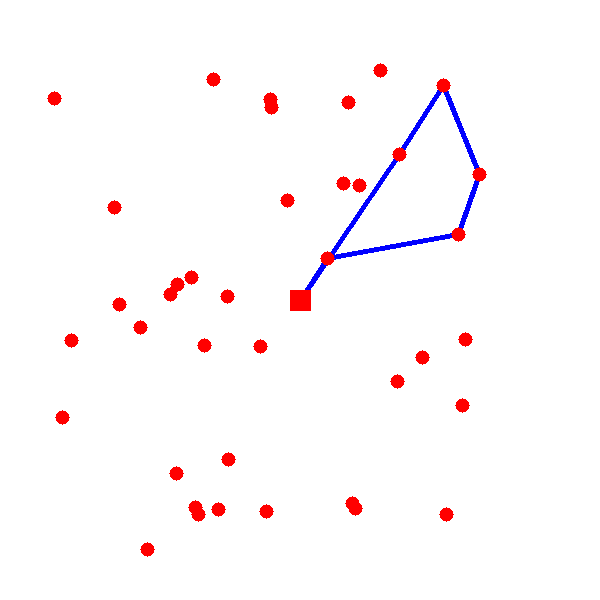

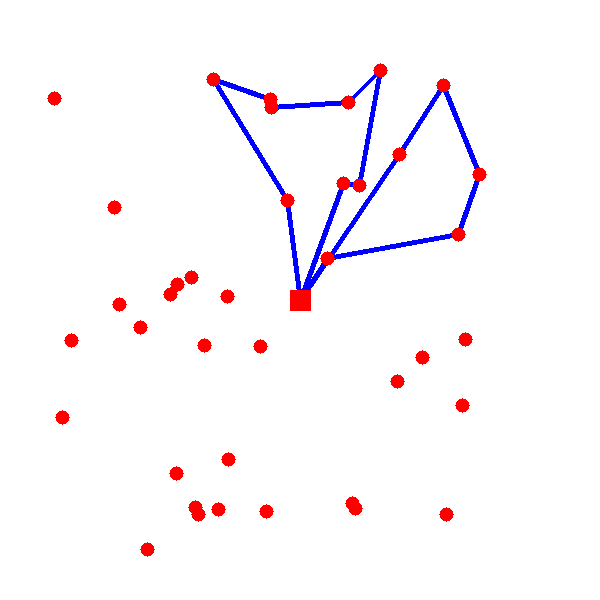

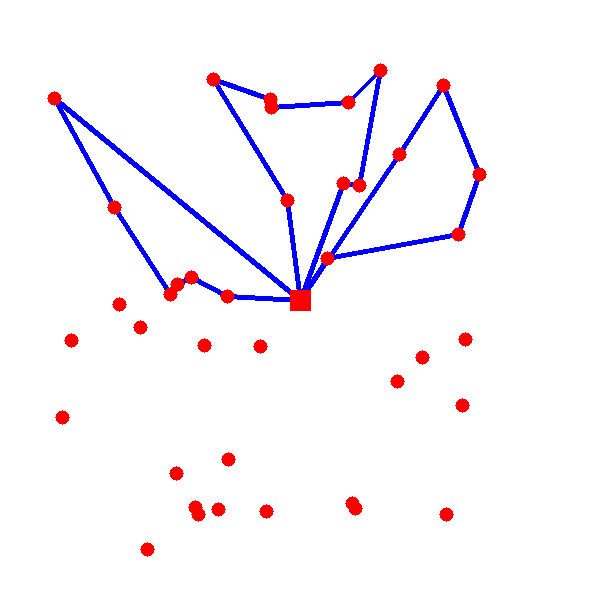

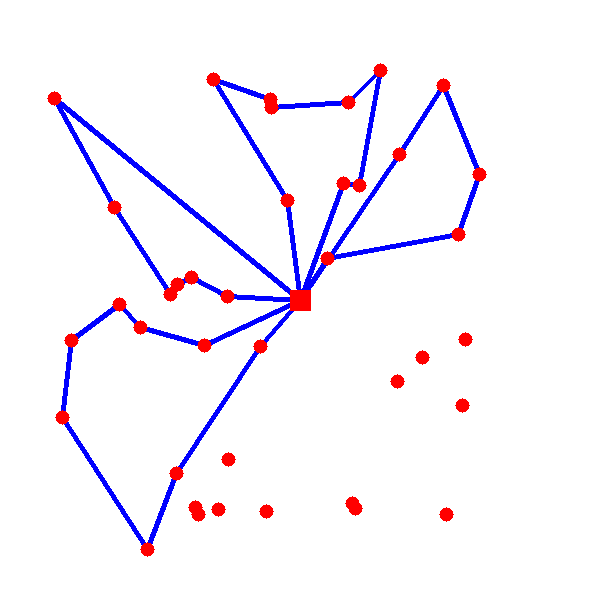

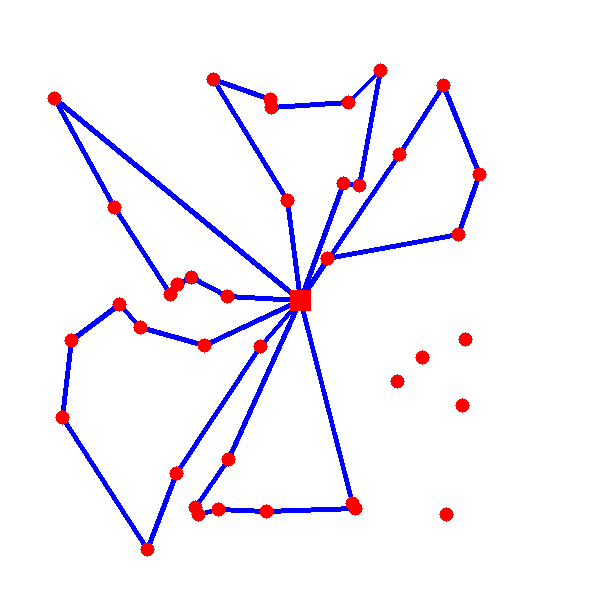

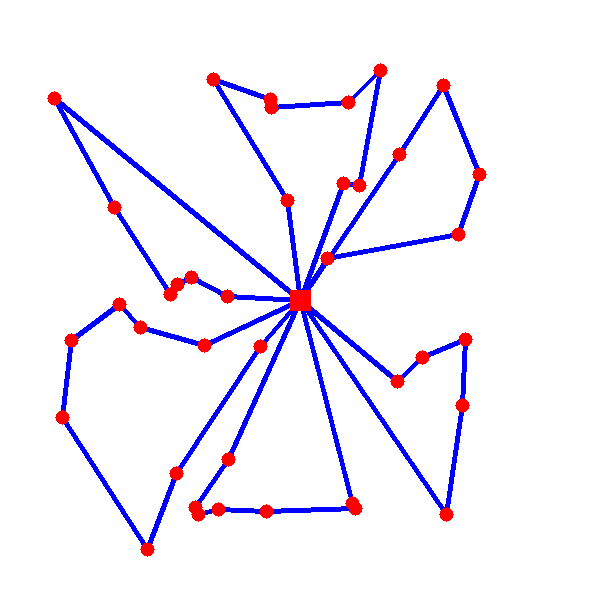

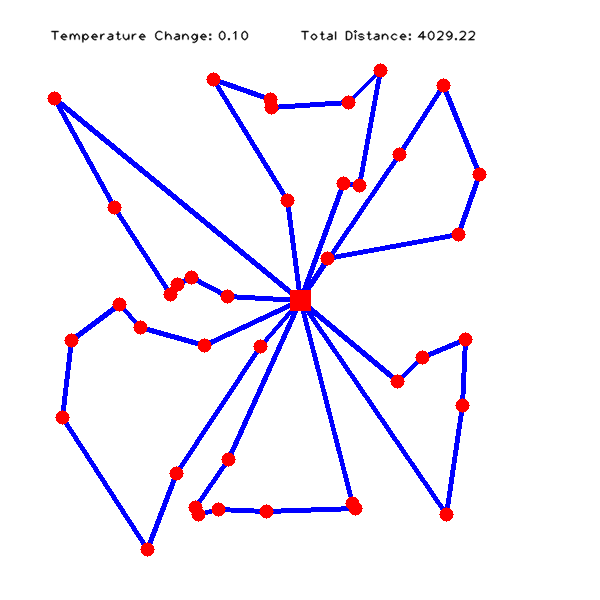

In [ ]:
from random import *                        # FOR GENERATE RANDOMS VALUES
import math as m                            # FOR MATH OPERATION (f(x),exp)
import numpy as np                          # FOR CREATE THE WINDOW VISUALIZATION
import cv2                              # FOR VISUALAZE THE TSP
import matplotlib.pyplot as plt             # FOR EMPIRICAL ANALYSIS (in the future)
import time
from google.colab.patches import cv2_imshow

# ---------------------------------------------------------------------------------------------------------
# ------------------ RANDOMLY GENERATE A SOLUTION (AN ARRAY WITH A RANDOM ROAD) ---------------------------
# ---------------------------------------------------------------------------------------------------------
def Current_Road(num_clients):            # Current Road
    current_road  = [0]
    current_road2 = []
    for i in range(1,num_clients):
        current_road2.append(i)            # Add elements from 0 to number of cities in an Array
    shuffle(current_road2)                 # Mix/shuffle the elements in the array
    for j in current_road2:
        current_road.append(j)

    return current_road

#print(Current_Road(Number_Clients))

# ---------------------------------------------------------------------------------------------------------
# --------------- RANDOMLY GENERATE POINTS (CITIES) IN AN AREA GIVEN BY WIDTH AND HEIGHT ------------------
# ---------------------------------------------------------------------------------------------------------
def Clients_Creation (width, height, num_clients,num_zones):
    h1 = height//2
    w2 = width//2
    #Clients = [[(w2,h1)]]*num_zones
    Clients = {}
    for j in range (num_zones):
        Clients[j] = [(h1,w2)]

    for i in range(num_clients-1):
        axis_x = randint(50, width - 50)      # GENERATE A RANDON NUMBER FOR AXIS X
        axis_y = randint(50, height - 50)     # GENERATE A RANDON NUMBER FOR AXIS Y

            # ------------- desplazamiento del centro (0,0) - (300,300) --------
        x1 = (300 - axis_x)
        y1 = (300 - axis_y)
        x2 = (axis_x - 300)
        y2 = (axis_y - 300)

        z1 = y1/x2
        z2 = y1/x1
        z3 = y2/x1
        z4 = y2/x2

        ang = 0

        if axis_x >= 300 and axis_y <= 300:   # I cuadrante
            ang = m.degrees((m.atan(z1)))
            print((x2,y1))

        if axis_x < 300 and axis_y <= 300:    # II cuadrante
            ang = m.degrees((m.atan(z2)))
            ang = 180 - ang
            print((x1,y1))

        if axis_x < 300 and axis_y > 300:    # III cuadrante
            ang = m.degrees((m.atan(z3)))
            ang += 180
            #ang = 270 - ang
            print((x1,y2))

        if axis_x >= 300 and axis_y > 300:  # IV cuadrante
            ang = m.degrees((m.atan(z4)))
            #ang += 270
            ang = 360 - ang
            print((x2,y2))

        theta = 360/num_zones

        for i in range (0,num_zones):
            if ang >= i*theta and ang < (i+1)*theta:
                Clients[i].append((axis_x,axis_y))
    for key in Clients:
        print(key ," : ",Clients[key])

    return Clients

#print(Clients_Creation(Width,Height,Number_Clients,Number_Zones))

# ---------------------------------------------------------------------------------------------------------
# ------------------- DEFINING THE COST FUNCTION (DISTANCE) FOR SOLVING THE TSP ---------------------------
# ---------------------------------------------------------------------------------------------------------
def Cost_function (Point_a, Point_b):
    delta_x = Point_a[0] - Point_b[0]
    delta_y = Point_a[1] - Point_b[1]
    Distance = m.sqrt(delta_x ** 2 + delta_y ** 2)   # Formula to calculate the distance btw two Points
    return Distance

def Total_Distance (Clients,current_road):
    #print(len(current_road),len(Clients))
    Total_distance = 0
    for i in range (len(Clients)):
        Point_a = current_road[i]
        Point_b = current_road[i-1]
        Total_distance += Cost_function (Clients[Point_a], Clients[Point_b])  # Total distance traveled through all cities

    return Total_distance

# ---------------------------------------------------------------------------------------------------------
# ------------------------ CHOOSING A NEW ROAD (SWAPING TWO VALUES IN THE ARRAY) --------------------------
# ---------------------------------------------------------------------------------------------------------
def Neighbour_Road(Current_road):
    New_road = Current_road[:]
    # --- Randomly choose two positions of the solution road (equivalents to the cities array position) ----
    swap_a = randint(1,len(Current_road)-1)
    swap_b = randint(1,len(Current_road)-1)
    while swap_b == swap_a:
        swap_b = randint(1,len(Current_road)-1)
    # ------- Exchanging/Swaping those positions in the road (Swaping the cities) ----------
    New_road[swap_a] , New_road[swap_b] = New_road[swap_b] , New_road[swap_a]
    return New_road

# ---------------------------------------------------------------------------------------------------------
# ----------------------------- VISUALIZTION FOR THE TSP SOLVED BY SAA ------------------------------------
# ---------------------------------------------------------------------------------------------------------

def Visualization(Window,Width, Height, Clients,Current_road,Tempi,Initial_Cost_Function_Value):

    # --------------------------- Creating the visualization window -----------------------------
    # Window = 255*np.ones((Height,Width,3), dtype = np.uint8)

    # ----------------------- Ploting the road between the nodes (cities) -----------------------
    for i in range (len(Clients)):
        Point_a = Clients[Current_road[i]]
        Point_b = Clients[Current_road[i-1]]
        cv2.line(Window, Point_a, Point_b, (255,0,0),3)

    # ------------------------ Ploting the nodes (cities) with a circle shape -------------------
    for client in Clients:
        axis_x = client[0]
        axis_y = client[1]
        # cv2.circle(Window, PointLocation, Radious, Color BGR, Linewidth / Fill = -1) ----  FORMAT
        cv2.circle(Window,(axis_x,axis_y),7,(0,0,255),-1)

    # ------------------------ Ploting a depot node (square) in the center ----------------------
    h1 = Height//2 - 10
    w1 = Width//2 - 10
    h2 = Height//2 + 10
    w2 = Width//2 + 10
    #cv2.rectgl("ventana,esq-iz-coor,esq-der-coor,color,rellenar")
    cv2.rectangle(Window,(h1,w1),(h2,w2),(0,0,255),-1)

    # ---------------- Ploting the basic datas (Temp change and Distance traveled) --------------

    # # cv2.putText(Window,"Text",Location in window,Font,Font Size, Color BGR, Linewidth, Line Type) ----  FORMAT
    # cv2.putText(Window,f"Temperature Change: ",(50,40),1,0.9,(0,0,0),1,cv2.LINE_AA)
    # cv2.putText(Window,f"Total Distance: ",(300,40),1,0.9,(0,0,0),1,cv2.LINE_AA)
    # cv2.putText(Window, f" {Tempi:.2f}", (210, 40), 1, 0.9, (0,0,0),1,cv2.LINE_AA)
    # cv2.putText(Window, f" {Initial_Cost_Function_Value:.2f}", (410, 40), 1, 0.9, (0,0,0),1,cv2.LINE_AA)

    cv2_imshow( Window)      #Title of the Window, show window
    cv2.waitKey(1)          # Time in "ms" to show the frames

    #if Tempi <= 0.01: cv2.destroyAllWindows()
    return Initial_Cost_Function_Value

# ---------------------------------------------------------------------------------------------------------
# ------------------------------------ SIMULATED ANNEALING ALGORITHM --------------------------------------
# ---------------------------------------------------------------------------------------------------------

# ----------------------------------------------- Code ----------------------------------------------------

def Simulated_Annealing (Width, Height, Clients, num_zones, Tempinicial, Tempf,Cooling_Rate):
    # num_Clients = len(Clients)
    # Road = Current_Road(num_Clients)
    # Visualization(Width, Height, Clients,Road,Tempinicial,0)
    Minimum_Distance = 0

    # --------------------------- Creating the visualization window -----------------------------
    Window = 255*np.ones((Height,Width,3), dtype = np.uint8)

    # ------------------------ Ploting the nodes (cities) with a circle shape -------------------
    for client in Clients:
        for clt in Clients[client]:
            axis_x = clt[0]
            axis_y = clt[1]
            # cv2.circle(Window, PointLocation, Radious, Color BGR, Linewidth / Fill = -1) ----  FORMAT
            cv2.circle(Window,(axis_x,axis_y),7,(0,0,255),-1)

    for i in range(num_zones):
        Clients2 = Clients.get(i)    # podria obtener las ciudades fuera de esta funcion e ingresarla como parametro
        num_Clients = len(Clients2)
        Road = Current_Road(num_Clients)
        Initial_Cost_Function_Value = Total_Distance(Clients2, Road)

        Tempi = Tempinicial
        if num_Clients > 2:
            while Tempi > Tempf:              # podria colocar directamente (0 o 1) en vez de Final temperature
                New_road = Neighbour_Road(Road)
                New_Cost_Function_Value = Total_Distance(Clients2,New_road)
                if New_Cost_Function_Value < Initial_Cost_Function_Value:
                    Road = New_road
                    Initial_Cost_Function_Value = New_Cost_Function_Value
                else:
                    Probability_criteria = m.exp(-(New_Cost_Function_Value - Initial_Cost_Function_Value)/
                                                Tempi)
                    if Probability_criteria > uniform(0,1):
                        Road = New_road
                        Initial_Cost_Function_Value = New_Cost_Function_Value
                Tempi *= Cooling_Rate

                #Visualization(Window,Width, Height, Clients2,Road,Tempi,Initial_Cost_Function_Value)
            Dist_min = Visualization(Window,Width, Height, Clients2,Road,Tempi,Initial_Cost_Function_Value)
        if num_Clients == 2:
            # ----------------------- Ploting the road between the nodes (cities) -----------------------

            Point_a = Clients2[0]
            Point_b = Clients2[1]
            cv2.line(Window, Point_a, Point_b, (255,0,0),3)
            Dist_min = Cost_function(Point_a,Point_b)

        if num_Clients == 1:
            Dist_min = 0

        Minimum_Distance += Dist_min

    # ---------------- Ploting the basic datas (Temp change and Distance traveled) --------------
    cv2.putText(Window,f"Temperature Change: ",(50,40),1,0.9,(0,0,0),1,cv2.LINE_AA)
    cv2.putText(Window,f"Total Distance: ",(300,40),1,0.9,(0,0,0),1,cv2.LINE_AA)
    cv2.putText(Window, f" {Tempi:.2f}", (210, 40), 1, 0.9, (0,0,0),1,cv2.LINE_AA)
    cv2.putText(Window, f" {Minimum_Distance:.2f}", (410, 40), 1, 0.9, (0,0,0),1,cv2.LINE_AA)

    Visualization(Window,Width, Height, Clients2,Road,Tempi,Minimum_Distance)
    cv2.waitKey(0)
    #time.sleep(3)

# ---------------------------------------------------------------------------------------------------------
# ------------------------------------------- BASIC DATAS -------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
Width = 600
Height = 600
Number_Clients = 40
Number_Zones = 6
Tempi = 120
Tempf = 0.1
Cooling_Rate = 0.999

# ---------------------------------------------------------------------------------------------------------
# --------------------------------------CALL THE MAIN ALGORITHM -------------------------------------------
# ---------------------------------------------------------------------------------------------------------
Clients = Clients_Creation(Width , Height , Number_Clients, Number_Zones)
#print(Clients)

Simulated_Annealing(Width, Height, Clients, Number_Zones, Tempi, Tempf, Cooling_Rate)
